In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import geopandas as gpd
from cartopy.io import shapereader
import glob

In [ ]:
xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [2]:
files = glob.glob("Data/*")  # all files/folders
f_name = 'Data/' + 'ESACCI-GHG-L2-CH4-CO-TROPOMI-WFMD-20240301-fv3.nc'
ds = xr.open_dataset(f_name)

In [8]:
ds

<xarray.Dataset> Size: 349MB
Dimensions:                 (sounding_dim: 559149, level_dim: 21,
                             layer_dim: 20, corners_dim: 4)
Dimensions without coordinates: sounding_dim, level_dim, layer_dim, corners_dim
Data variables: (12/34)
    time                    (sounding_dim) datetime64[ns] 4MB ...
    latitude                (sounding_dim) float32 2MB ...
    longitude               (sounding_dim) float32 2MB ...
    solar_zenith_angle      (sounding_dim) float32 2MB ...
    sensor_zenith_angle     (sounding_dim) float32 2MB ...
    azimuth_difference      (sounding_dim) float32 2MB ...
    ...                      ...
    co_column               (sounding_dim) float32 2MB ...
    h2o_column              (sounding_dim) float32 2MB ...
    h2o_column_uncertainty  (sounding_dim) float32 2MB ...
    satellite_altitude      (sounding_dim) float32 2MB ...
    satellite_latitude      (sounding_dim) float32 2MB ...
    satellite_longitude     (sounding_dim) float32 2MB ...
Attributes: (12/35)
    title:                     TROPOMI/WFMD XCH4 and XCO
    institution:               University of Bremen
    source:                    TROPOMI L1B version 02.01.00
    history:                   2023 - product generated with WFMD
    tracking_id:               fac4c8b6-9929-4409-819e-41702034be6b
    Conventions:               CF-1.6
    ...                        ...
    time_coverage_resolution:  P1D
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open access
    platform:                  Sentinel-5 Precursor
    sensor:                    TROPOMI
    spatial_resolution:        5.5km x 7km at nadir (typically)

In [10]:
# Extract variables
xch4 = ds["xch4"]
lat = ds["latitude"]
lon = ds["longitude"]

In [22]:
# Optional: Mask invalid or fill values (e.g., where xch4 <= 0 or NaN)
valid = xch4.where((xch4 > 0) & (~xch4.isnull()), drop=True)
c_valid = valid
lat = lat.where(valid.notnull(), drop=True)
lon = lon.where(valid.notnull(), drop=True)

#### Plot data with colour scale

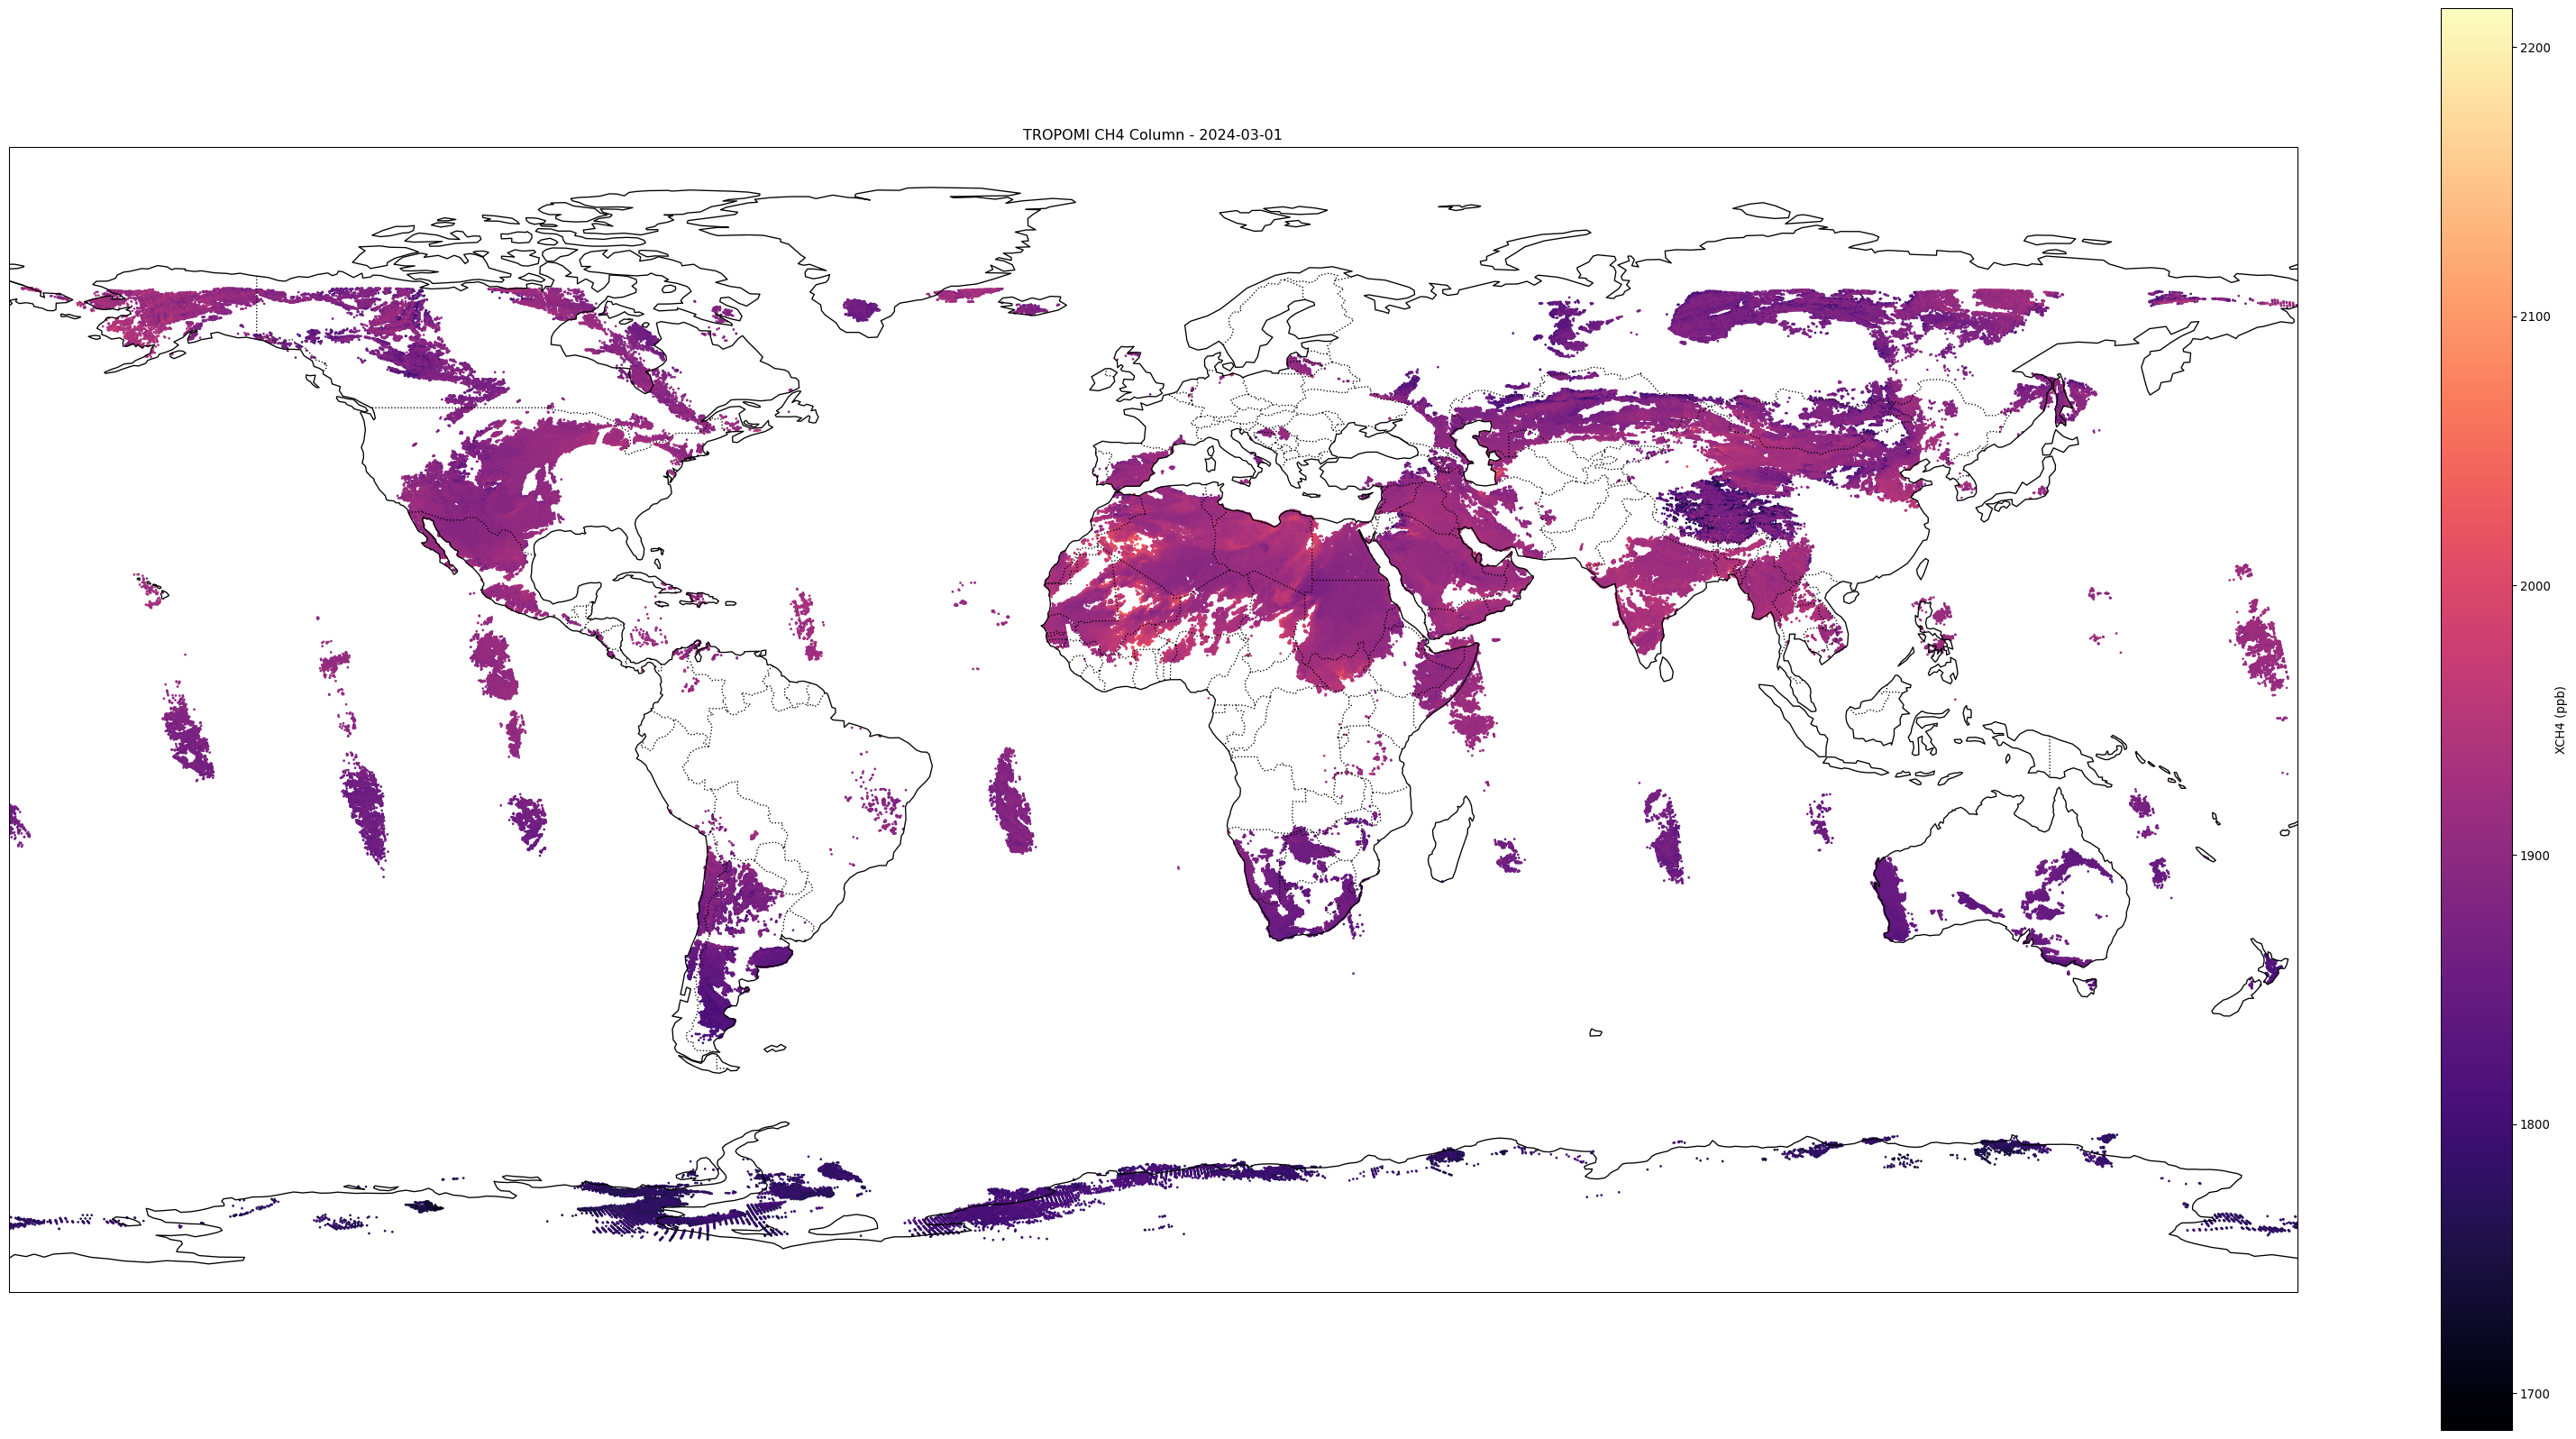

In [83]:
# Plot
#4K
dpi = 96
width_in = 4096 / dpi
height_in = 2048 / dpi

fig = plt.figure(figsize=(width_in, height_in), dpi=dpi)

# fig = plt.figure(figsize=(12, 6)) # This was the default size setting
ax = plt.axes(projection=ccrs.PlateCarree())

sc = ax.scatter(
    lon, lat, c=valid, s=1, cmap="magma", transform=ccrs.PlateCarree()
)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()
plt.colorbar(sc, label="XCH4 (ppb)")
plt.title("TROPOMI CH4 Column - 2024-03-01")
# plt.savefig('test_map_plot_4k.png', dpi = 96)
plt.show()

#### To scale 4K Plot

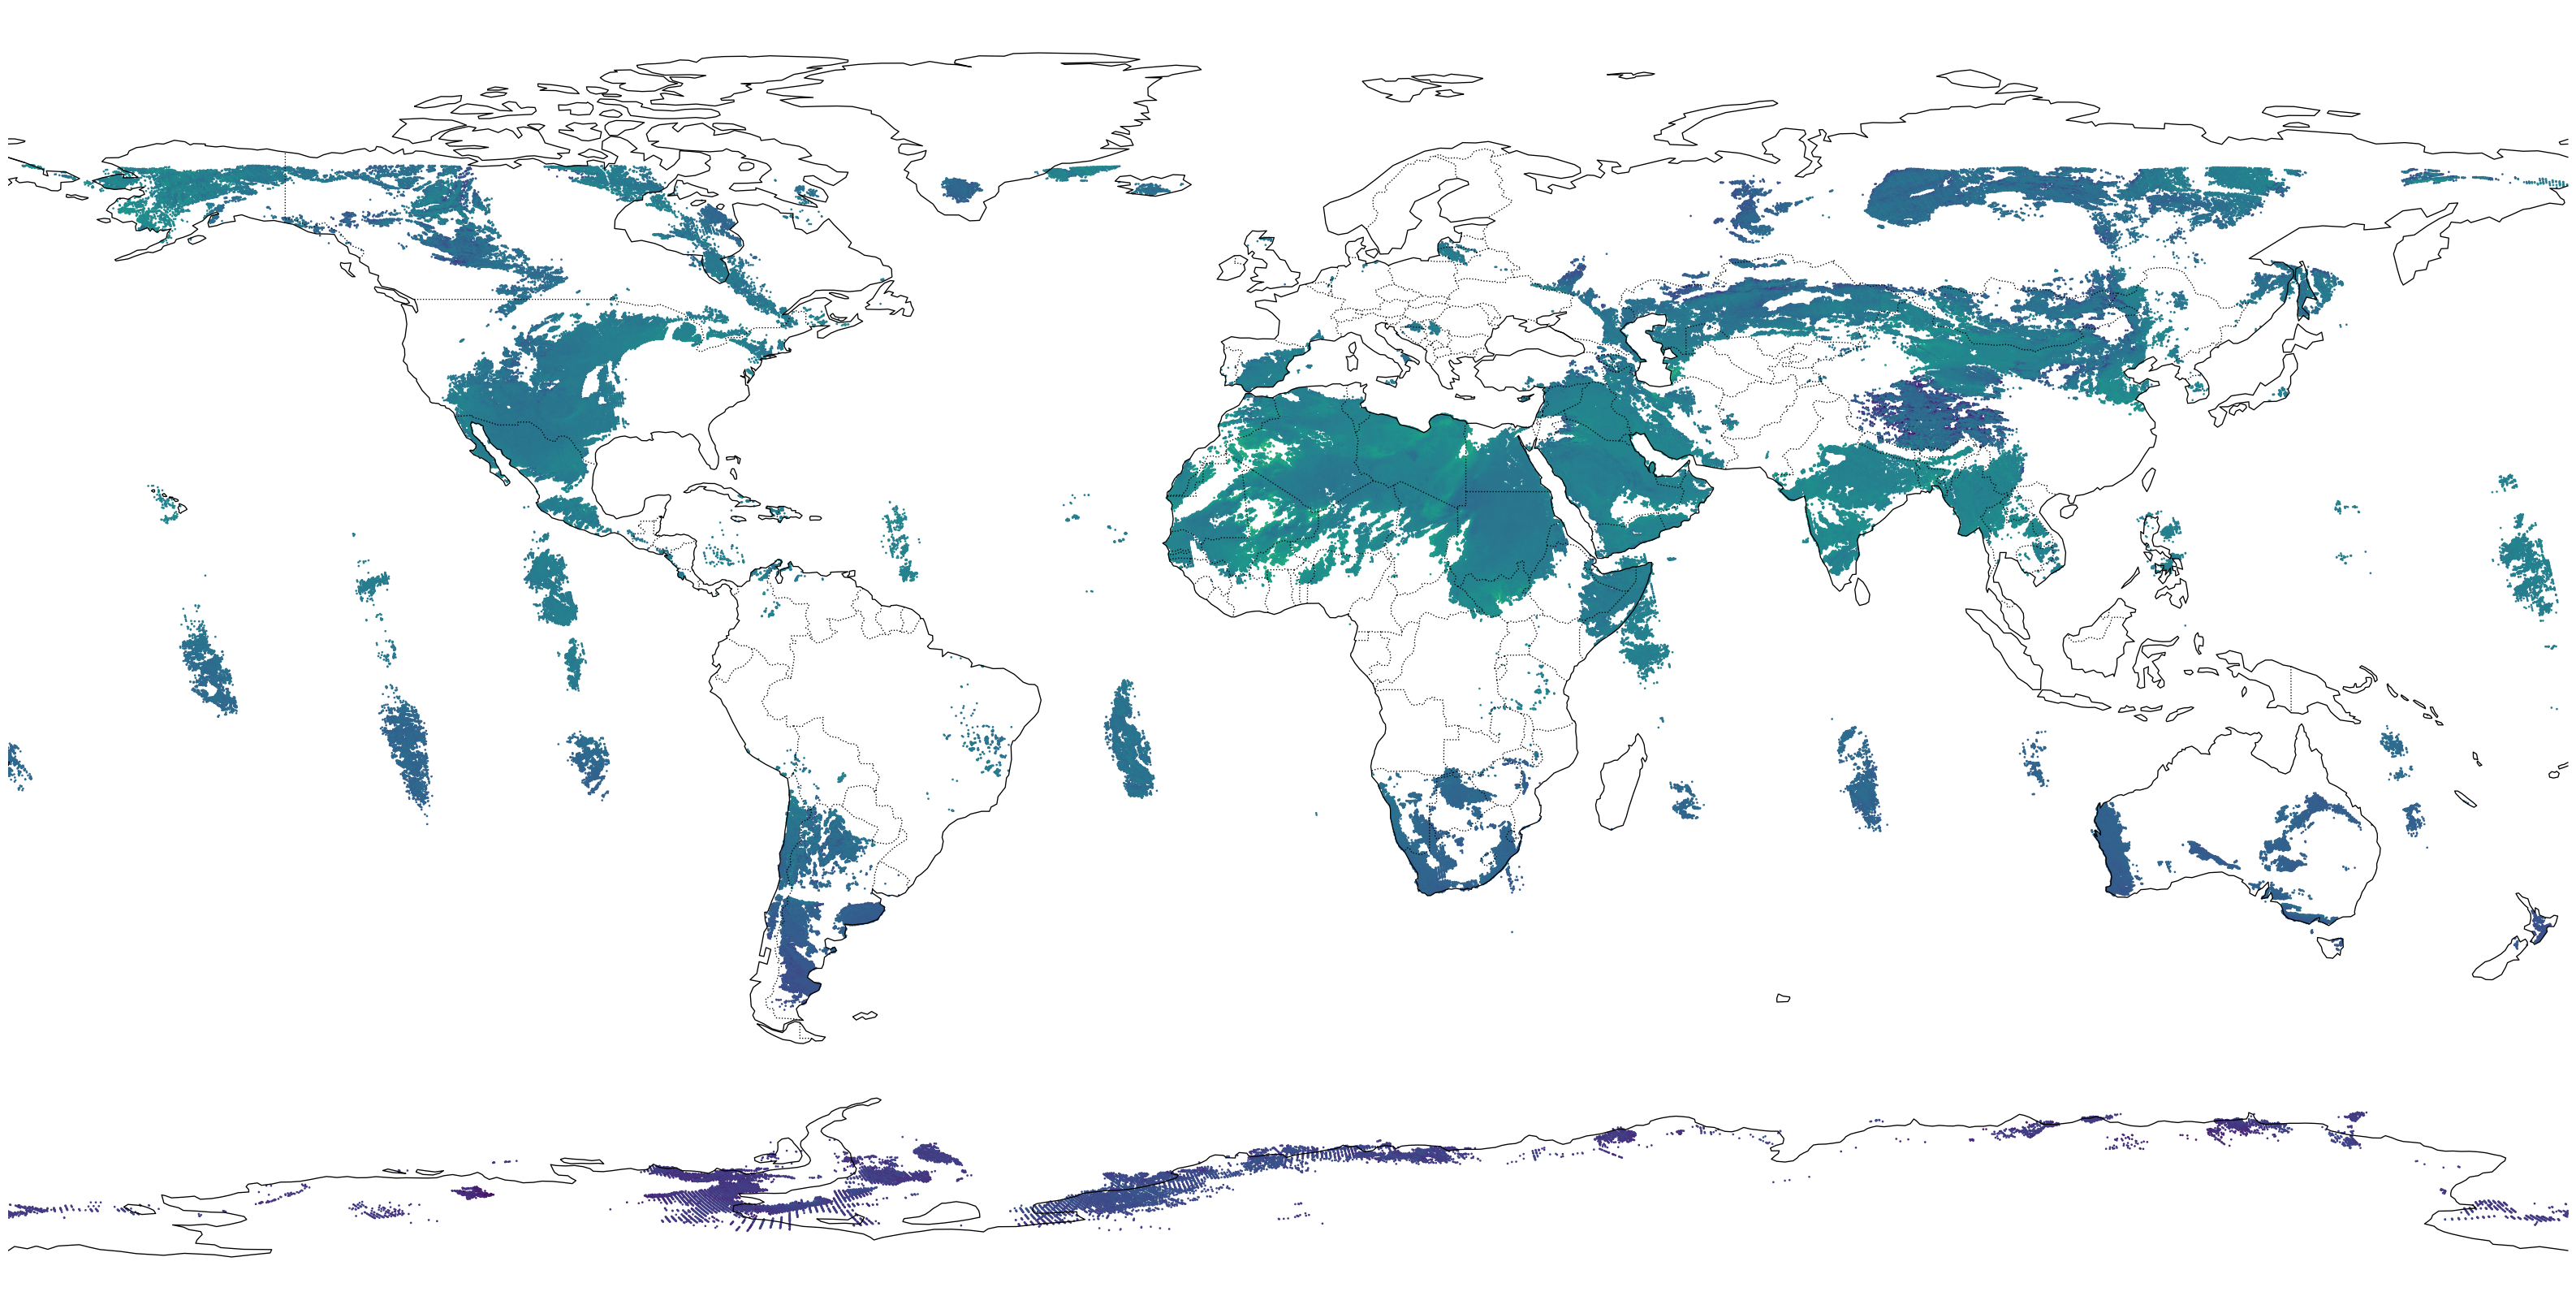

In [15]:
# Set your DPI and target size
dpi = 96  # can be any number; 96 is common

# #2K
# width_in = 2048 / dpi
# height_in = 1024 / dpi

#4K
width_in = 4096 / dpi
height_in = 2048 / dpi

fig = plt.figure(figsize=(width_in, height_in), dpi=dpi)

ax = plt.axes(projection=ccrs.PlateCarree())

# Plot scatter without title or colorbar
sc = ax.scatter(
    lon, lat, c=valid, s=1, cmap="viridis", transform=ccrs.PlateCarree()
)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()

# Optional: remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Optional: turn off spines/frame
for spine in ax.spines.values():
    spine.set_visible(False)

# Save the figure tightly around the map
plt.savefig("to_scale_4k.png", dpi=dpi, bbox_inches='tight', pad_inches=0)
plt.show()

### Testing Colour Palettes out for plotting

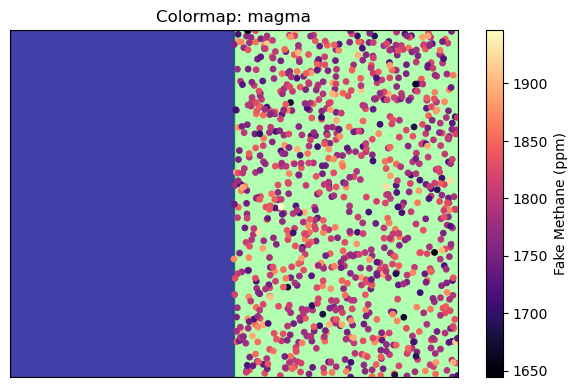

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# ========== SETTINGS ==========
LAND_COLOR = "green"
LAND_COLOR = (0, 1.0, 0, 0.3)  # RGB for green + alpha
# LAND_COLOR = (0, 100/255, 0, 0.3)  # RGB = (0, 100, 0), Alpha = 0.5


# SEA_COLOR = "darkblue"
CMAP_TO_TEST = "magma"  # Try 'plasma', 'inferno', 'cividis', etc.
N = 1000  # number of fake data points
# ==============================

# Generate fake points over land area (right half)
np.random.seed(0)
x = np.random.uniform(0, 1, N)          # Only right half (land)
y = np.random.uniform(0, 1, N)
fake_methane = np.random.normal(loc=1800, scale=50, size=N)

# Create plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot sea (left half rectangle)
ax.add_patch(plt.Rectangle((0, 0), 0.5, 1, color=SEA_COLOR, zorder=0, alpha = 0.75))

# Plot land (right half rectangle)
ax.add_patch(plt.Rectangle((0.5, 0), 0.5, 1, color=LAND_COLOR, zorder=0))

# Plot fake methane data only on land
sc = ax.scatter(x * 0.5 + 0.5, y, c=fake_methane, cmap=CMAP_TO_TEST, s=15, zorder=1)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Fake Methane (ppm)", fontsize=10)

# Final touches
ax.set_title(f"Colormap: {CMAP_TO_TEST}", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

### Plotting Sea in 'Sea colour'

#### To scale 4K Plot with Sea Masked

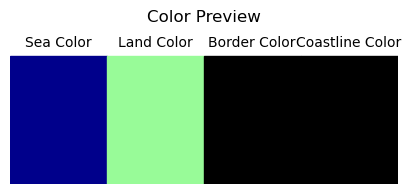

In [4]:
# Test colour plot

# ========== USER-DEFINED COLOURS ==========
SEA_COLOR = "darkblue"     # Change sea color here
# SEA_COLOR = "lightgreen" 
# SEA_COLOR = (0, 0, 139/255, 0.75)  # darkblue with 75% opacity

LAND_COLOR = "palegreen"        # Change land color here
# LAND_COLOR = (0, 1.0, 0, 0.4)  # RGB for green + alpha

BORDER_COLOR = "black"      # Country border color
COASTLINE_COLOR = "black"   # Coastline color
# ==========================================

# Preview figure
fig, ax = plt.subplots(figsize=(5, 2))
colors = [SEA_COLOR, LAND_COLOR, BORDER_COLOR, COASTLINE_COLOR]
labels = ["Sea Color", "Land Color", "Border Color", "Coastline Color"]

for i, (color, label) in enumerate(zip(colors, labels)):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, 1.05, label, ha='center', va='bottom', fontsize=10)

ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1.2)
ax.axis("off")
plt.title("Color Preview")
plt.show()


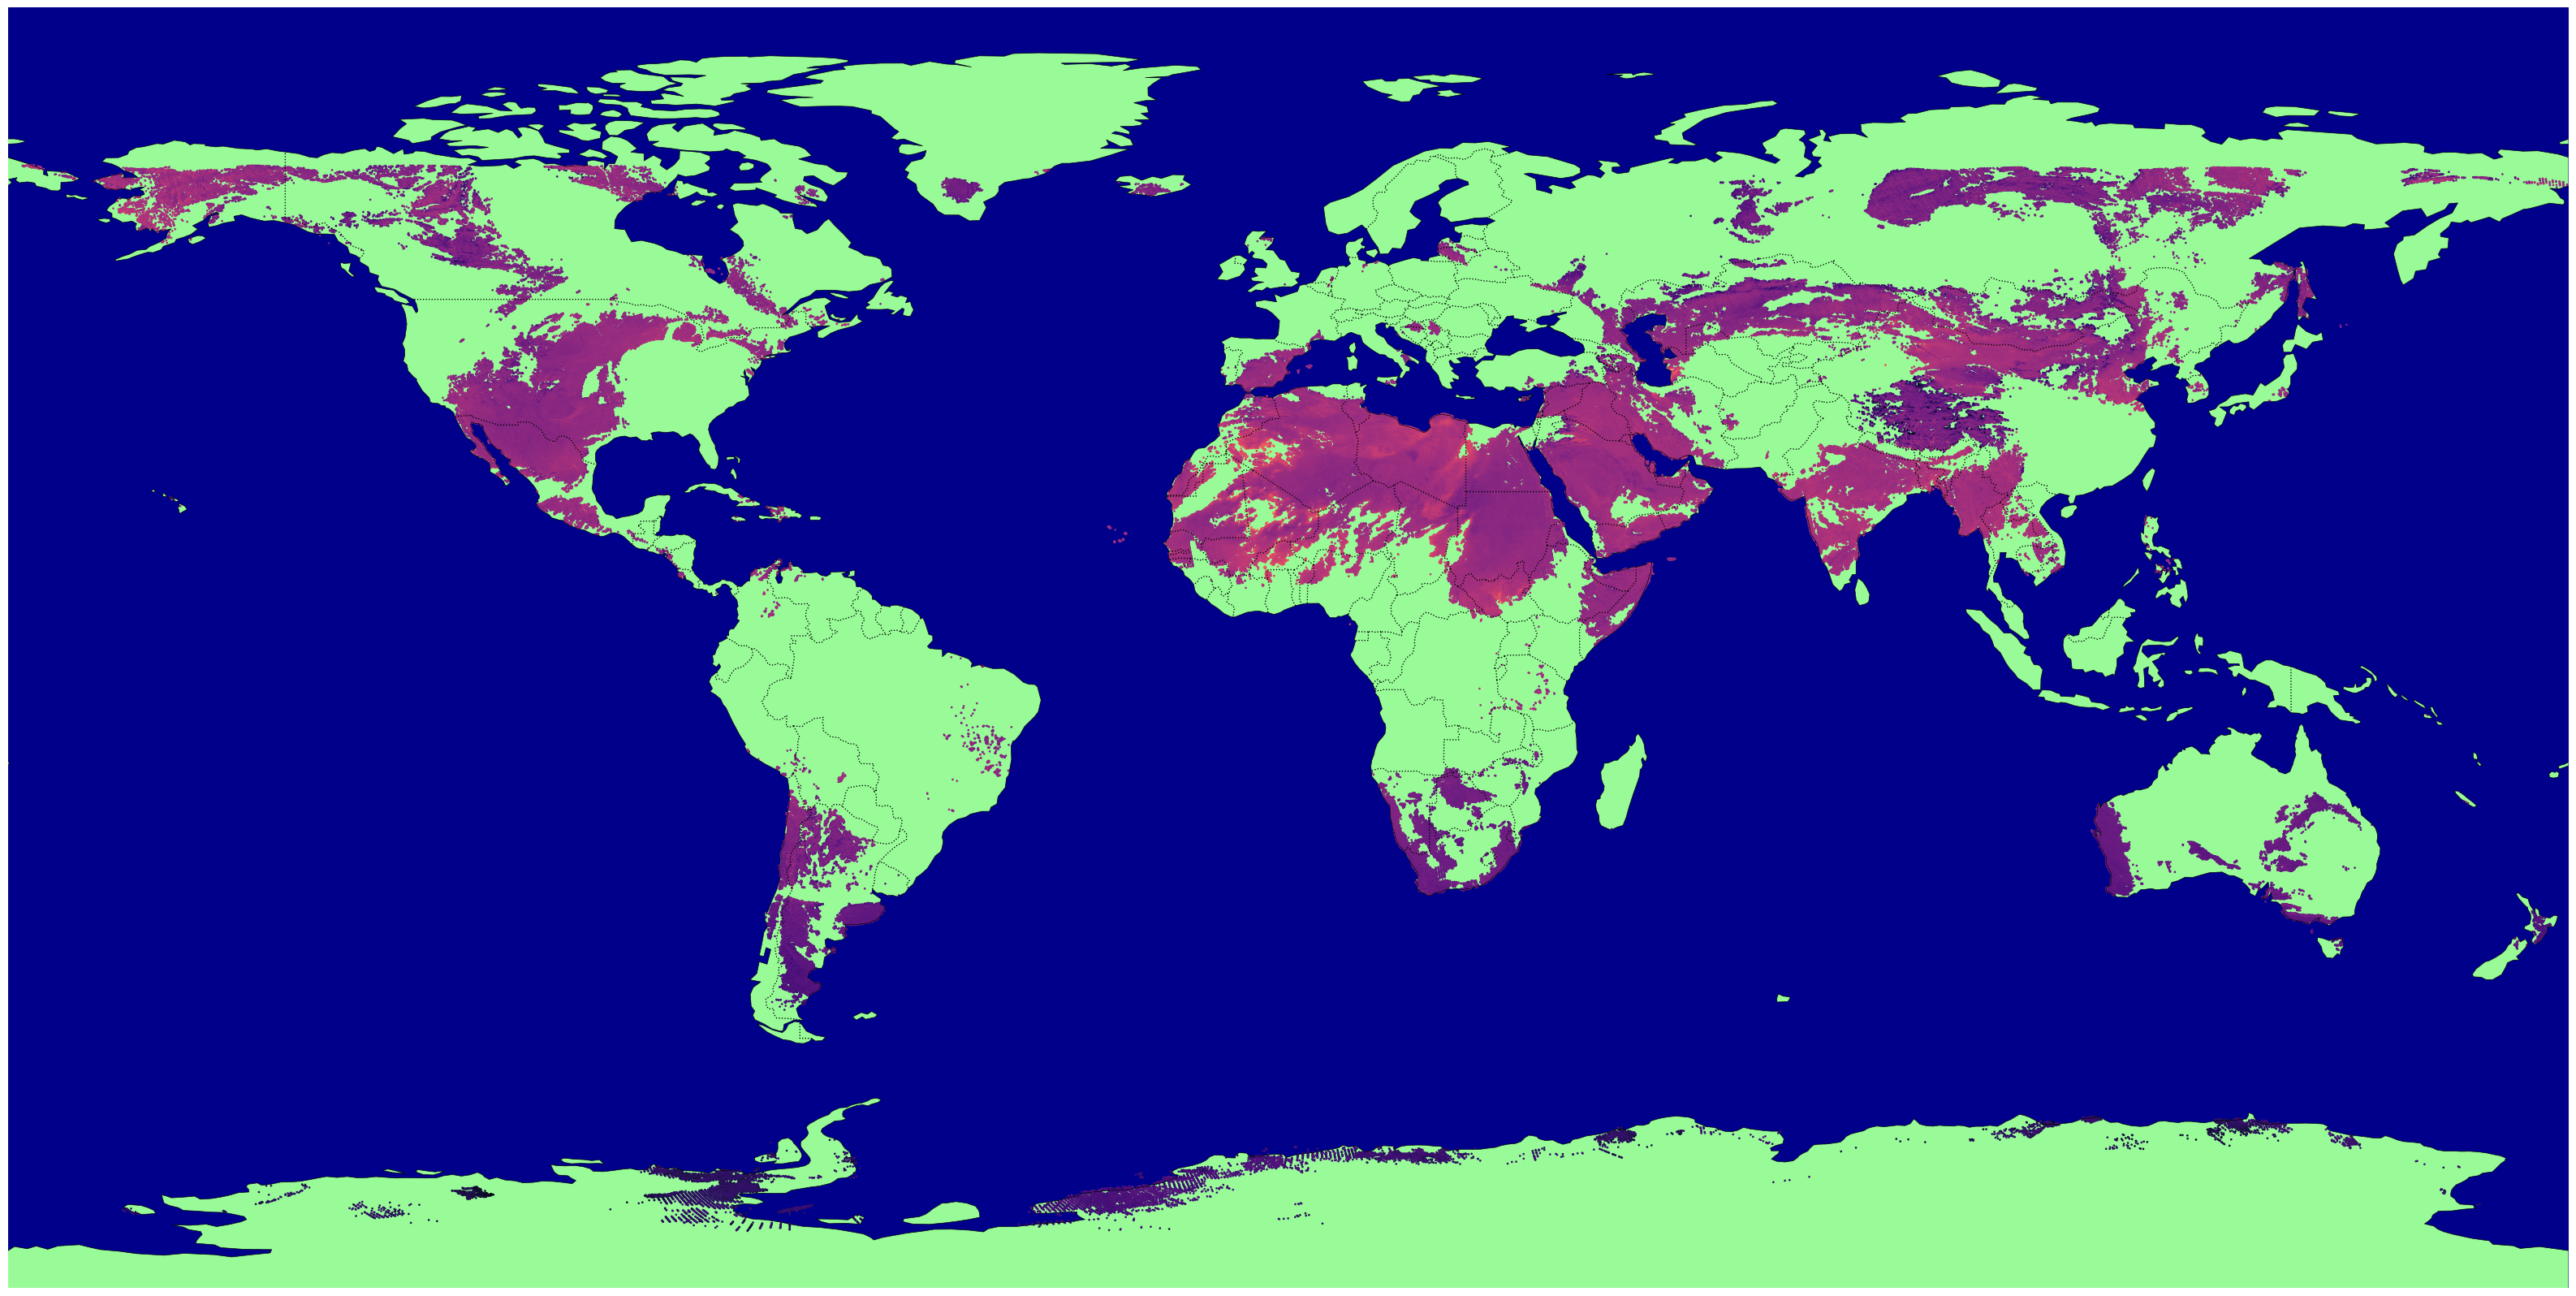

In [77]:
# Colours defined above
# ==========================================

# Example inputs (replace these with your TROPOMI data arrays)
# lon, lat, c_valid = ...

# Set DPI and figure size
dpi = 96
width_in = 4096 / dpi
height_in = 2048 / dpi

fig = plt.figure(figsize=(width_in, height_in), dpi=dpi)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_facecolor(SEA_COLOR)  # Sea background color

# Add land as a white shape layer
ax.add_feature(cfeature.LAND.with_scale('110m'), facecolor=LAND_COLOR, edgecolor='none')

# Load land polygons for masking
land = gpd.read_file("shapefiles/ne_10m_admin_0_countries.shp")  # Adjust path if needed

# Convert lon/lat to Point geometries
points = gpd.GeoSeries([Point(xy) for xy in zip(lon, lat)], crs="EPSG:4326")

# Keep only land points
land_points = gpd.sjoin(gpd.GeoDataFrame(geometry=points), land, how="inner", predicate="within")

# Extract only land values
valid_indices = land_points.index
lon_land = np.array(lon)[valid_indices]
lat_land = np.array(lat)[valid_indices]
c_valid_land = np.array(c_valid)[valid_indices]

# Scatter plot for land-only data
sc = ax.scatter(
    lon_land, lat_land, c=c_valid_land, s=1,
    cmap="magma", transform=ccrs.PlateCarree()
)

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor=BORDER_COLOR)
ax.coastlines(color=COASTLINE_COLOR, linewidth=0.5)

# Remove ticks and frame
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Save the figure
plt.savefig("to_scale_4k_landonly_3_magma_vibrant.png", dpi=dpi, bbox_inches='tight', pad_inches=0)
plt.show()